<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PRACTICA2/P2_Python_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr"></p>

<h1><b>Práctica 2: Señales y Sistemas discretos
</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4>Ana María Seguro Acevedo<h4>
<h4>Mariana Álvarez Yarce<h4>

#<b>Procedimiento</b>

<h4>Realice los enunciados en un Notebook o un script entregable.</h4>

<h4>Implemente las siguientes funciones, tanto las que se presentan como las que se propone implementar: intente usar la lógica empleada en la función impulso para la generación de las de más funciones.</h4>

##<b><h3>Impulso unitario</b></h3>
<h4>El impulso unitario se define como:
<center>$δ(n-n_0)=\left\{\begin{array}{ll} 1 & \text{si } n = n_0\\ 0 & \text{si } n \neq n_0\end{array}\right.$</center></h4>






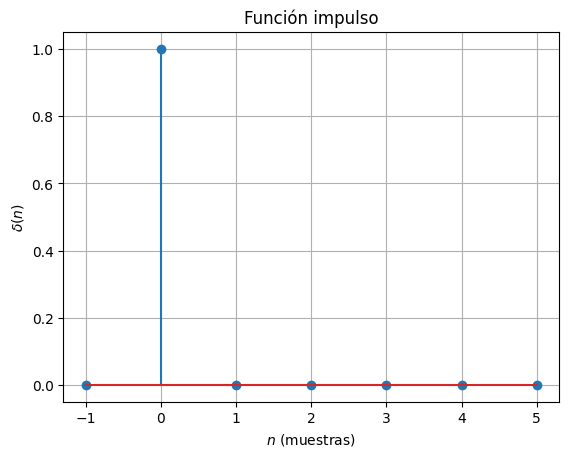

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def impulse(n0, n1, n2):
  # Genera x(n) = delta(n-n0); n1 <= n <= n2
  n = np.arange(n1, n2+1) # Se crea el vector de muestras
  x = np.where(n-n0 == 0, 1, 0)
  return [x, n]

plt.stem(impulse(0, -1, 5)[1], impulse(0, -1, 5)[0])
plt.xlabel('$n$ (muestras)')
plt.ylabel('$\delta(n)$')
plt.title('Función impulso')
plt.grid(True)
plt.show()

##<b><h3>Escalón unitario</b></h3>
<h4>El escalón unitario se define como:

<center>$u(n-n_0)=\left\{\begin{array}{ll} 1 & \text{si } n \geq n_0\\ 0 & \text{si } n < n_0\end{array}\right.$</center></h4><br>

<h4><b>1)</b> Implemente una función en Python que permita generar una función escalón unitario, definida en un intervalo de $n_1 \leq n_0 \leq n_2$.</h4>

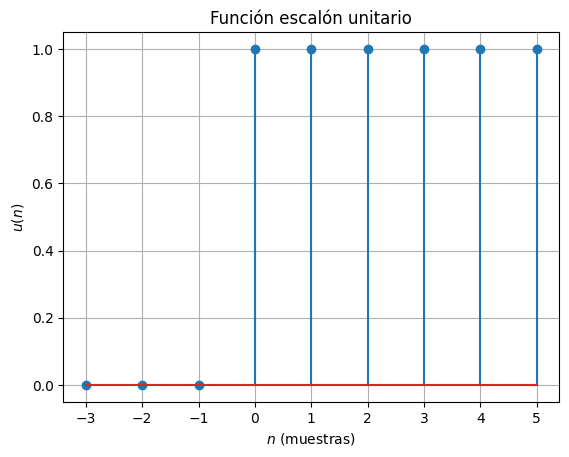

In [ ]:
def unit_step(n0, n1, n2):
  n = np.arange(n1, n2+1)
  x = np.where(n-n0 >= 0, 1, 0)
  return [x, n]

plt.stem(unit_step(0, -3, 5)[1], unit_step(0, -3, 5)[0])
plt.xlabel('$n$ (muestras)')
plt.ylabel('$u(n)$')
plt.title('Función escalón unitario')
plt.grid(True)
plt.show()

##<b><h3>Rampa</b></h3>
<h4>La función rampa se define como:

<center>$r(n-n_0)=\left\{\begin{array}{ll} 0 & \text{si } n < n_0\\ n-n_0 & \text{si } n \geq n_0\end{array}\right.$</center></h4><br>

<h4><b>2)</b> Implemente una función en Python que permita generar una función rampa, definida en un intervalo $n_1 \leq n_0 \leq n_2$ con una pendiente $m$.</h4>

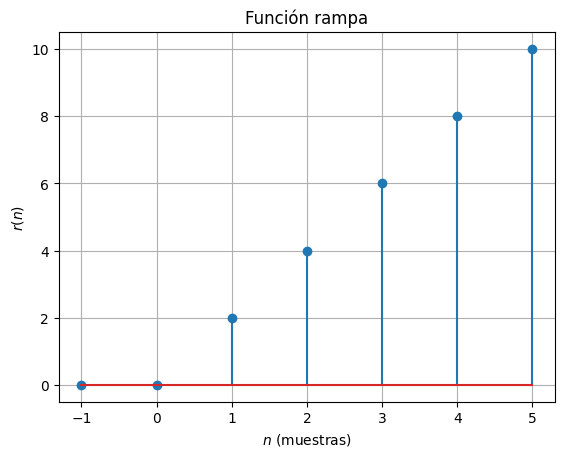

In [ ]:
def ramp(n0, n1, n2, m):
  n = np.arange(n1, n2+1)
  x = np.where(n >= n0,(n-n0)*m, 0)
  return [x,n]

plt.stem(ramp(0, -1, 5, 2)[1], ramp(0, -1, 5, 2)[0])
plt.xlabel('$n$ (muestras)')
plt.ylabel('$r(n)$')
plt.title('Función rampa')
plt.grid(True)
plt.show()

##<b><h3>Sinusoides</b></h3>
<h4>Estas secuencias son de la forma:

<center>$x(n)=sin(ω_0 + θ_0)$</center></h4><br>

##<h4><b>3)</b> Genere las siguientes secuencias usando las funciones básicas de Python que se han presentado. Grafique los resultados.</h4>


<b>a.</b> $x_1(n)=3δ(n+1)+5δ(n+3)+3δ(n+2)+3δ(n)+δ(n)$. ¿Cómo debe ser el vector de muestras?

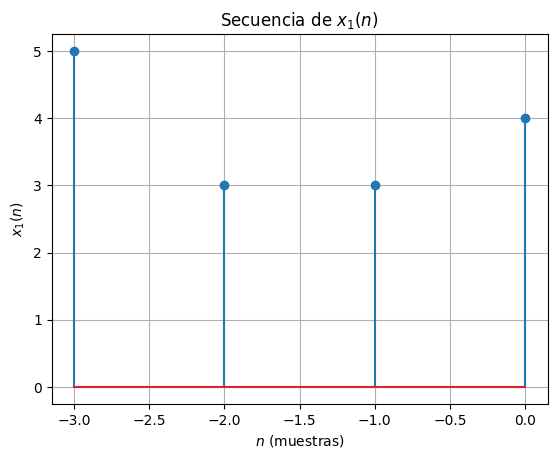

In [ ]:
x1 = 3*impulse(-1, -3, 0)[0] + 5*impulse(-3, -3, 0)[0] + 3*impulse(-2, -3, 0)[0] + 3*impulse(0, -3, 0)[0] + impulse(0, -3, 0)[0] #se usan solo los vectores x que retorna la funcion

plt.stem(impulse(0, -3, 0)[1], x1) #se usa solo el vector de muestras n que retorna la funcion
plt.title('Secuencia de $x_1(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x_1(n)$')
plt.grid(True)
plt.show()

Para definir el rango del vector de muestras $n$, los límites deben incluir todos los valores de adelanto en la ecuación. En este caso, el mayor adelanto se da en 3 y el menor en 0, por eso el vector de muestras debe ser al menos ir desde -3 hasta 0 ($𝑛=[−3,−2,−1,0]$). Asimismo, este vector que se ingresa a la función del impulso debe ser igual para cada término de la ecuacion, debido a que la suma de arreglos requiere iguales dimensiones.

<b>b.</b> El siguiente sistema arroja una secuencia definida entre $−6 \leq n \leq 6$

<b>Nota:</b> el símbolo ⊗ corresponde a un multiplicador y el ⊕ a un sumador

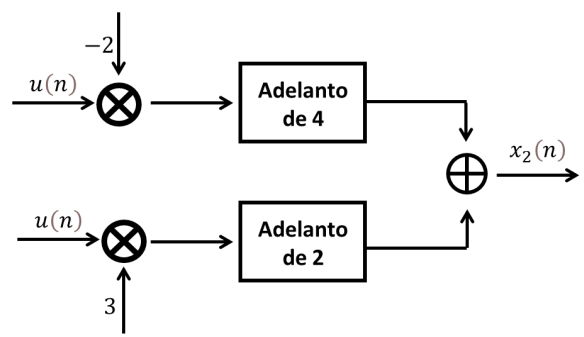

Interpretando el diagrama, se determinan los términos de la ecuación de la siguiente manera:
- $u(n)$ se multiplica por un escalar -2 y se adelanta 4 muestras
- $u(n)$ se multiplica por un escalar 3 y se adelanta 2 muestras
- Ambas entradas se igualan a la función $x_2(n)$

A partir de las deducciones anteriores, $x_2(n)$ se expresa con la siguiente ecuación:
<center>$x_2(n)=-2⋅u(n+4)+3⋅u(n+2)$</center>

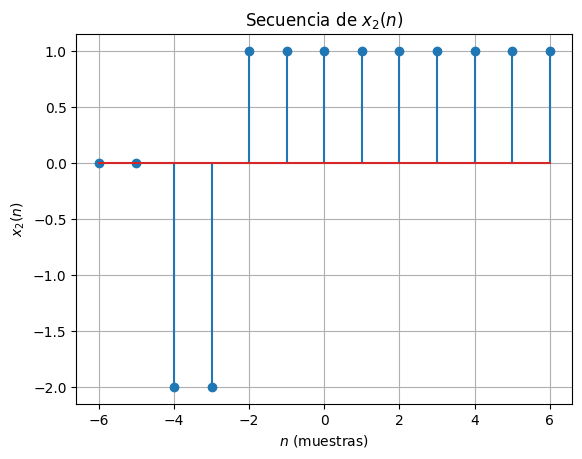

In [ ]:
x2 = -2*unit_step(-4, -6, 6)[0] + 3*unit_step(-2, -6, 6)[0]

plt.stem(unit_step(0, -6, 6)[1], x2)
plt.title('Secuencia de $x_2(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x_2(n)$')
plt.grid(True)
plt.show()

<b>c.</b> El siguiente sistema arroja una secuencia definida entre $0 \leq n \leq 100$

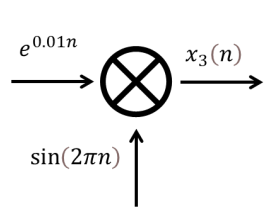

Interpretando el diagrama, se determinan los términos de la ecuación de la siguiente manera:
- $e^{0.01n}$ se multiplica por $sin(2πn)$
- El producto se iguala a la función $x_3(n)$

A partir de las deducciones anteriores, $x_3(n)$ se expresa con la siguiente ecuación:<br>
<center>$x_3(n)=e^{0.01n} \cdot sin(2πn)$</center>

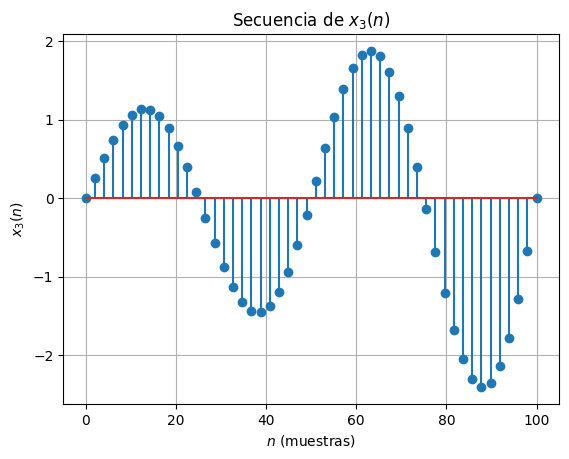

In [ ]:
n = np.linspace(0, 100)
x3 = np.exp(0.01*n) * np.sin(2*np.pi*n)

plt.stem(n, x3)
plt.title('Secuencia de $x_3(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x_3(n)$')
plt.grid(True)
plt.show()

<b>d.</b> $x_4(n)=2r(n+3)−r(n−2)−5u(n−3)$, en el intervalo $−10 \leq n \leq 10$.

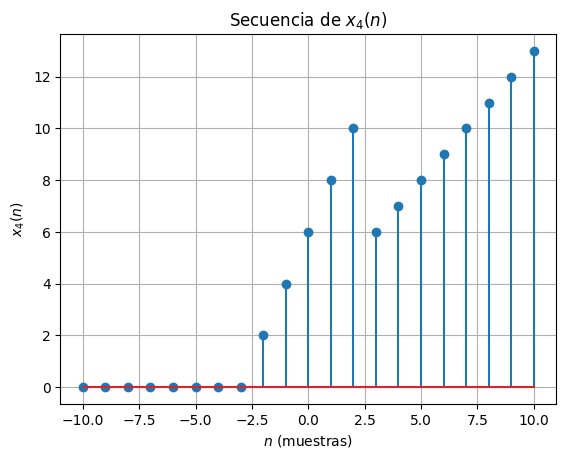

In [ ]:
x4 = 2*ramp(-3, -10, 10, 1)[0] - ramp(2, -10, 10, 1)[0]- 5*unit_step(3, -10, 10)[0]
plt.stem(unit_step(0, -10, 10)[1], x4)
plt.title('Secuencia de $x_4(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x_4(n)$')
plt.grid(True)
plt.show()

##<h4><b>4)</b> Genere la siguiente secuencia</h4>

<h4><center>$x[n]=\left\{\begin{array}{ll} \hspace{0.4cm} r[n] & \hspace{0.5cm} 0 \leq n \leq 5\\ \hspace{0.1cm} r[n − 5] & \hspace{0.5cm} 6 \leq n \leq 11\\ r[n − 10] & \hspace{0.5cm} 12 \leq n \leq 17\end{array}\right.$</center></h4>

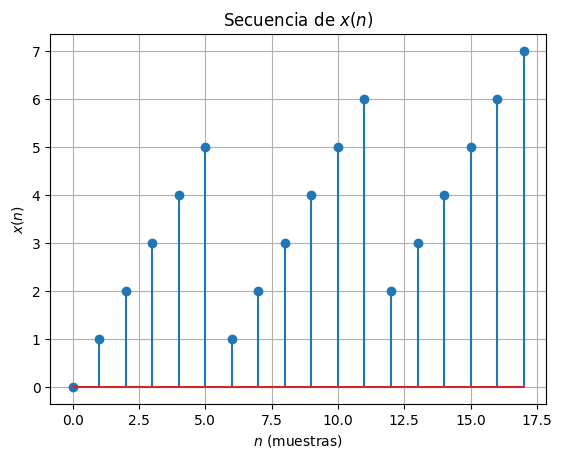

In [ ]:
r_n = ramp(0, 0, 5, 1)[0]
r_n5 = ramp(5, 6, 11, 1)[0]
r_n10 = ramp(10, 12, 17, 1)[0]

x = np.concatenate((r_n, r_n5, r_n10))
plt.stem(np.arange(0, len(x)), x)
plt.title('Secuencia de $x(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x(n)$')
plt.grid(True)
plt.show()

<b>a.</b> Derive la secuencia

Como la secuencia $x[n]$ está definida por funciones rampa discretas, la derivada no concuerda la derivada en tiempo continuo que es el escalón $u(t)$. Por el contrario, las rampas definidas en muestras constantes se derivan al restar la función con el retraso original y el retraso siguiente. Se expresa la derivada de cada término de la siguiente forma:

<center>$dx[n-k] = r[n-k] - r[n-(k+1)]$</center>

Donde $k$ es el retraso temporal

Con lo anterior, se puede expresar toda la secuencia derivada como la suma de los términos individuales de la siguiente forma:

<center>$dx[n] = r[n]-r[n-1] + r[n-5]-r[n-6] + r[n-10]-r[n-11]$</center>

Para facilitar el proceso, se usó la función <i>numpy.diff()</i> que calcula la derivada discreta de un vector, y se aplicó a cada término de la secuencia.


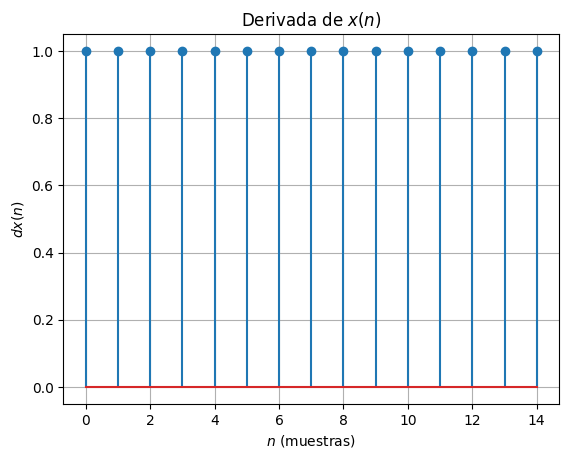

In [ ]:
dr_n = np.diff(ramp(0, 0, 5, 1)[0])
dr_n5 = np.diff(ramp(5, 6, 11, 1)[0])
dr_n10 = np.diff(ramp(10, 12, 17, 1)[0])

dx = np.concatenate((dr_n, dr_n5, dr_n10))
plt.stem(np.arange(0, len(dx)), dx)
plt.title('Derivada de $x(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$dx(n)$')
plt.grid(True)
plt.show()

<b>b.</b> Realice un subplot con las dos secuencias, la original, y la derivada. Describa lo que observa y el porqué no es exactamente la derivada del caso continuo.

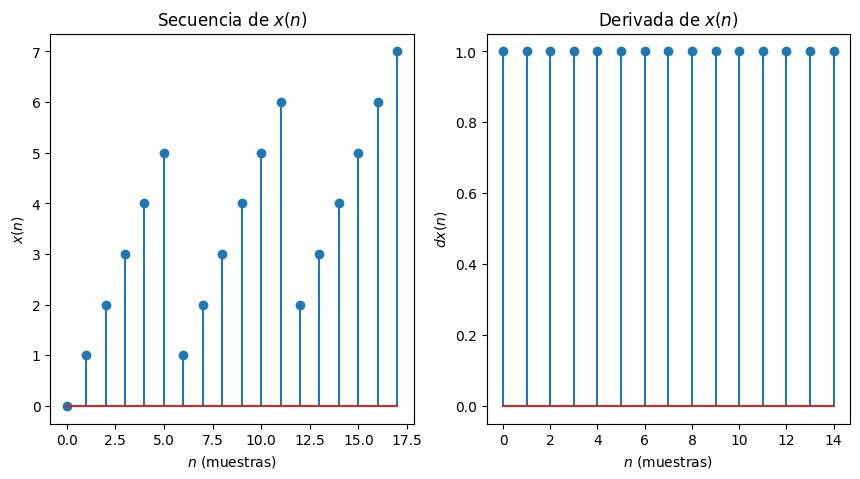

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, wspace=0.2, hspace=0.4)

axs[0].stem(np.arange(0, len(x)), x)
axs[0].set_title('Secuencia de $x(n)$')
axs[0].set_xlabel('$n$ (muestras)')
axs[0].set_ylabel('$x(n)$')

axs[1].stem(np.arange(0, len(dx)), dx)
axs[1].set_title('Derivada de $x(n)$')
axs[1].set_xlabel('$n$ (muestras)')
axs[1].set_ylabel('$dx(n)$')
plt.show()

Como la secuencia $x[n]$ es discreta, la derivada de la función rampa en cada tramo es constante. Por otro lado, en el tiempo continuo la derivada no está definida en $x=0$ debido a que se presenta incompatibilidad de las derivadas por la derecha e izquierda de 0. La derivada continua utiliza el concepto de límite para definir el cambio de la variable, mientras que la derivada discreta se determina por la diferencia entre muestras consecutivas.

Sea $x(n)=\{0,1,2,3,4,\hat{5},4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10\}$
##<h4><b>5)</b> Genere la secuencia anterior y grafique los resultados. Use las funciones que generó antes para generar la secuencia concatenando secuencias más simples. Además, encuentre las siguientes secuencias:</h4>

<h4><b>Nota:</b> Para generar los gráficos utilice el comando <i>stem()<i>.</h4>

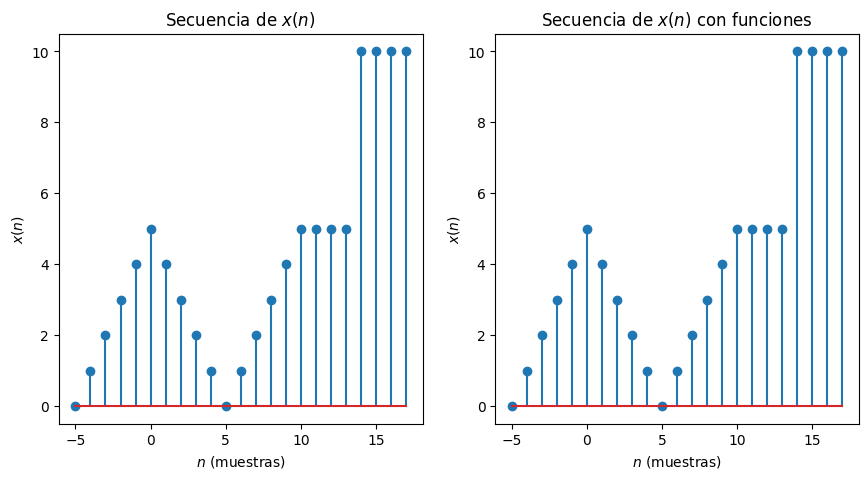

In [ ]:
x_n = np.array([0,1,2,3,4,5,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10])
simpler_x_n = np.concatenate((ramp(0, 0, 5, 1)[0], ramp(0, 6, 10, 1)[0][::-1]-6, ramp(0, 11, 15, 1)[0]-10, unit_step(0, 16, 18)[0]*5, unit_step(0, 19, 22)[0]*10))

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, wspace=0.2, hspace=0.4)

axs[0].stem(np.arange(-5, len(x_n)-5), x_n) #se grafica la secuencia centrada en 5, por eso se restan 5 posiciones al rango
axs[0].set_title('Secuencia de $x(n)$')
axs[0].set_xlabel('$n$ (muestras)')
axs[0].set_ylabel('$x(n)$')

axs[1].stem(np.arange(-5, len(simpler_x_n)-5), simpler_x_n)
axs[1].set_title('Secuencia de $x(n)$ con funciones')
axs[1].set_xlabel('$n$ (muestras)')
axs[1].set_ylabel('$x(n)$')
plt.show()

<b>a.</b> $x_5(n) = 2x(n − 4) + x(n)$

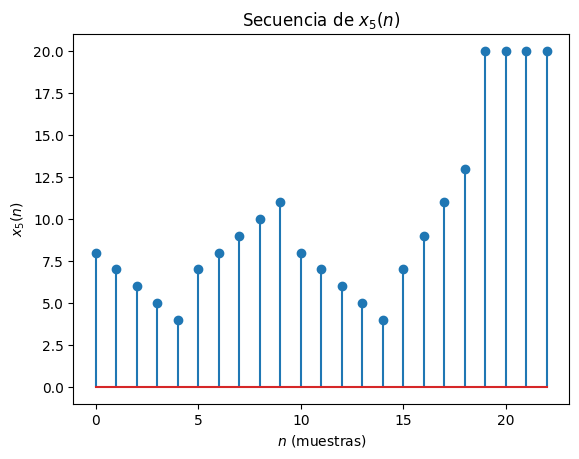

In [ ]:
x5 = np.zeros(len(x_n))
for n in range(len(x_n)):
  x5[n] = 2*x_n[abs(n-4)] + x_n[n]

plt.stem(np.arange(0, len(x5)), x5)
plt.title('Secuencia de $x_5(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x_5(n)$')
plt.show()

<b>b.</b> $x_6(n)=0.001e^{0.5n}x(n) + 10sin(0.05πn) x(n + 2)$, $−20≤n≤ 20$

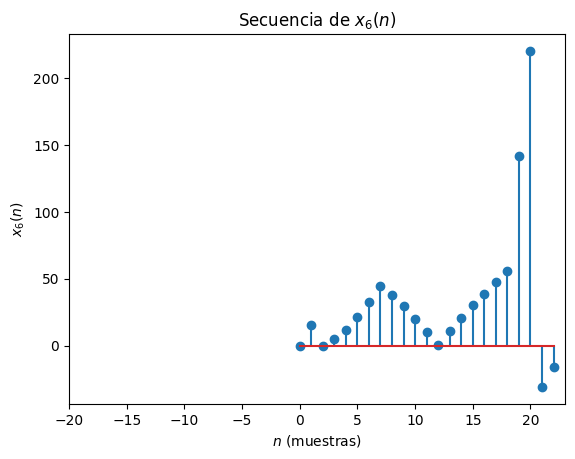

In [ ]:
x6 = np.zeros(len(x_n))
for n in range(-20, 21):
    if (n-2) < -5:
        x6[n] = 0
    else:
      x6[n] = 0.001*np.exp(0.5*n)*x_n[n] + 10*np.sin(0.05*np.pi*n)*x_n[n-2]

plt.stem(x6)
plt.xlim(-20, 23)
plt.title('Secuencia de $x_6(n)$')
plt.xlabel('$n$ (muestras)')
plt.ylabel('$x_6(n)$')
plt.show()